# Global Emigration Outlook

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

#  Part 1: Preprocessing Data

## 1.1 Downlaoding the dataset

In [6]:
!kaggle datasets download -d shreyasur965/global-emigration-trends-1990-2020 --unzip -p ./globel_emigration_trend

Dataset URL: https://www.kaggle.com/datasets/shreyasur965/global-emigration-trends-1990-2020
License(s): CC0-1.0
  0%|                                               | 0.00/14.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 5.12MB/s]


## Previewing the first few rows of the data

In [8]:
df = pd.read_csv('./globel_emigration_trend/total-number-of-emigrants.csv')  
df.head()

,Entity,Year,Total number of emigrants
0,Afghanistan,1990,7679582
1,Afghanistan,1995,4347049
2,Afghanistan,2000,4750677
3,Afghanistan,2005,4116739
4,Afghanistan,2010,5269518


# Part 2: Data Visualization

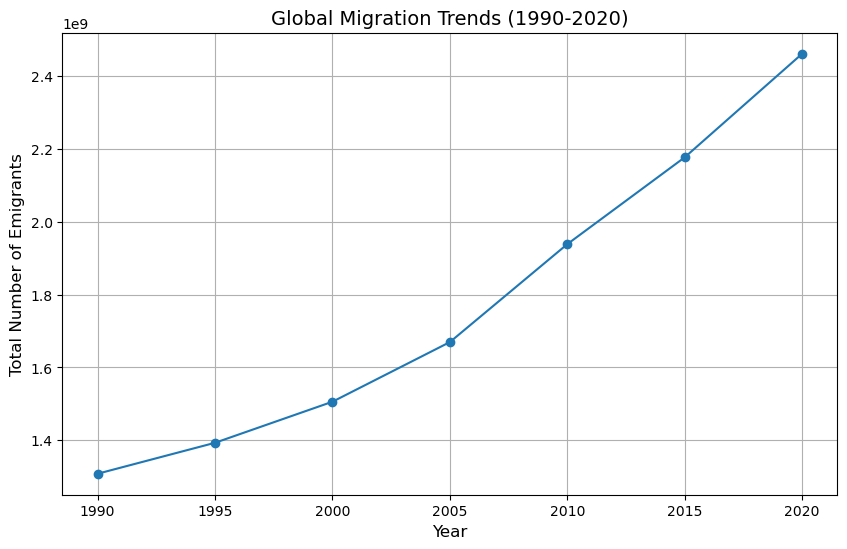

In [21]:
global_migration = df.groupby('Year')['Total number of emigrants'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(global_migration['Year'], global_migration['Total number of emigrants'], marker='o')
plt.title('Global Migration Trends (1990-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Emigrants', fontsize=12)
plt.grid(True)
plt.show()


# Part 3: Predicting Future Emigration 

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


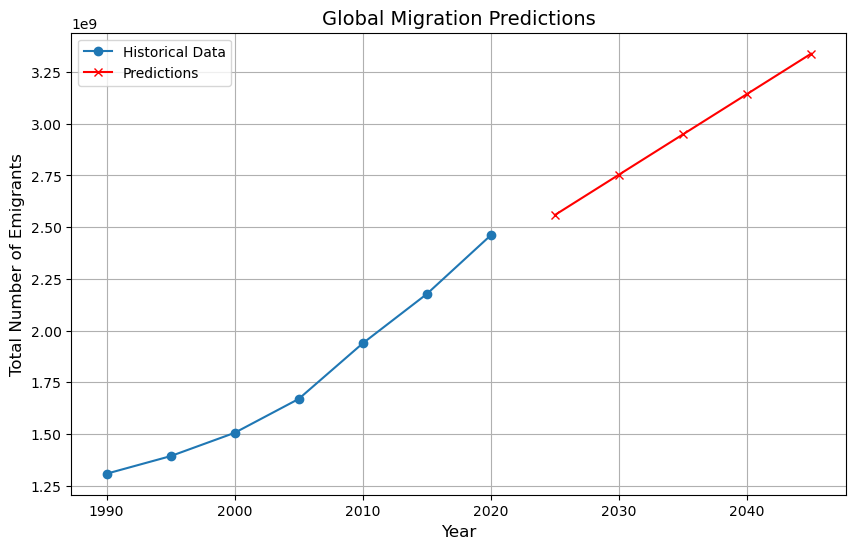

Predicted emigrants in 2025: 2,558,508,953
Predicted emigrants in 2030: 2,753,383,551
Predicted emigrants in 2035: 2,948,258,149
Predicted emigrants in 2040: 3,143,132,746
Predicted emigrants in 2045: 3,338,007,344


In [22]:
# Prepare the data
X = global_migration['Year'].values.reshape(-1, 1)  # Year as independent variable
y = global_migration['Total number of emigrants'].values  # Total number of emigrants as dependent variable

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values (e.g., for the next 5 years)
future_years = np.array([2025, 2030, 2035, 2040, 2045]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(global_migration['Year'], global_migration['Total number of emigrants'], marker='o', label='Historical Data')
plt.plot(future_years, predictions, marker='x', color='red', label='Predictions')
plt.title('Global Migration Predictions', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Emigrants', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
for year, pred in zip(future_years.flatten(), predictions):
    print(f"Predicted emigrants in {year}: {pred:,.0f}")
